In [5]:
%matplotlib inline
#%matplotlib notebook

import numpy as np
import textwrap

from runners.vStirapRunner import ExperimentalRunner, Atom4lvl, Cavity, LaserCoupling, CavityCoupling

# Contents
* [1.1 Vacuum Rabi oscillations](#sec_1_1)
* [1.2 Rabi oscillations](#sec_1_2)
* [1.3 v-Stirap](#sec_1_3)
    * [1.3.1 Python-defined pulse shapes](#sec_1_3_1)
    * [1.3.2 C-defined pulse shapes](#sec_1_3_2)
* [1.4 Spontaneous emission](#sec_1_4)
* [1.5 Customising the atom](#sec_1_5)
    * [1.5.1 Configured energy levels](#sec_1_5_1)
    * [1.5.2 Configured transition strengths](#sec_1_5_2)

# Section 1 - Simple 4-level atom

Here are some simple tests demonstrating a simple 4-level atom:
	- Three ground levels: 'gM', 'g', 'gP' with magnetic states -1, 0, +1 respectively.
	- One excited level: 'x' with magnetic state 0.
	- The transition strength between all ground levels and the exicted level are equal.

### 1.1 Vacuum Rabi oscillations
<a id='sec_1_1'></a>

With no spontaneous emission, and g > $\kappa$ we observe a damped oscillation on the cavity coupled transition.

In [11]:
atom4lvl = Atom4lvl(gamma=0)
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 0. * 2.*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

Pre-compiled Hamiltonian, ExperimentalRunner_Hamiltonian_0_17840.pyx, is suitable to run this experiment.


In [12]:
psi0 = runner.ket('x',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

Running simulation with 501 timesteps...finished in 0.084 seconds


(<matplotlib.figure.Figure at 0x10e766080>,
 <matplotlib.figure.Figure at 0x12000eb38>)

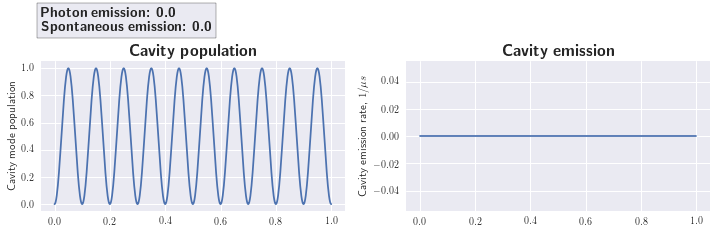

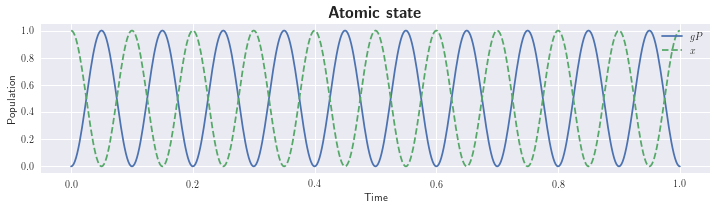

In [8]:
results.plot(['gP', 'x'])

Detuning the cavity from resonance results in smaller Rabi osciallations at a higher frequency.

Pre-compiled Hamiltonian, ExperimentalRunner_Hamiltonian_0_9944.pyx, is suitable to run this experiment.
Running simulation with 501 timesteps...finished in 0.088 seconds


(<matplotlib.figure.Figure at 0x11b5778d0>,
 <matplotlib.figure.Figure at 0x11b5d2dd8>)

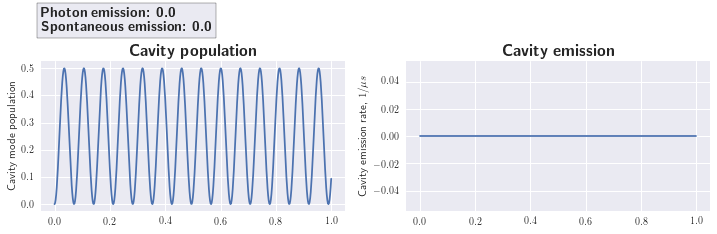

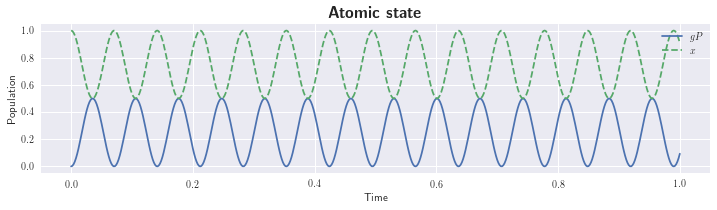

In [9]:
cavity_coupling.deltaC = 10 * 2*np.pi

psi0 = runner.ket('x',0)
t_length = 1
n_steps = 501

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

results = runner.run(psi0, t_length, n_steps)

results.plot(['gP', 'x'])

The Rabi oscillations can be damped by both cavity decay ($\kappa$) and spontaneous emission ($\gamma$).

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_1_9944.pyx.  Generated in 3.713 seconds.
Running simulation with 501 timesteps...finished in 0.08 seconds


(<matplotlib.figure.Figure at 0x11b968f98>,
 <matplotlib.figure.Figure at 0x11bedd630>)

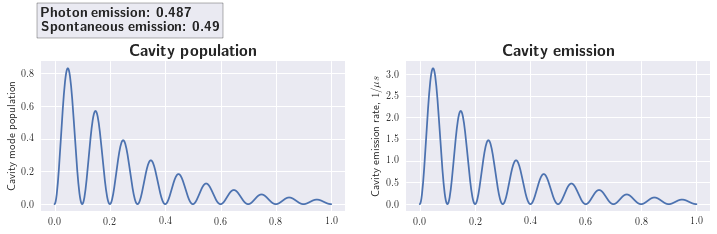

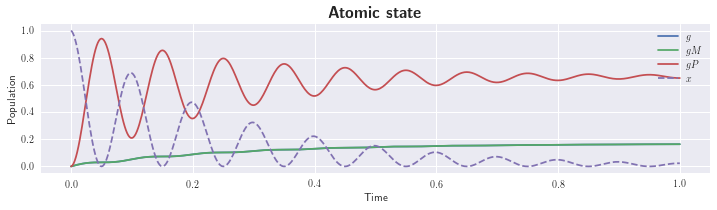

In [10]:
atom4lvl.gamma = 0.3 * 2*np.pi
cav.kappa = 0.3 * 2*np.pi
cavity_coupling.deltaC = 0 * 2*np.pi

psi0 = runner.ket('x',0)
t_length = 1
n_steps = 501

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

results = runner.run(psi0, t_length, n_steps)

results.plot()

### 1.2 Rabi oscillations
<a id='sec_1_2'></a>

Of course we can drive Rabi oscillations with a laser too.

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_2_9944.pyx.  Generated in 3.945 seconds.
Running simulation with 501 timesteps...finished in 0.109 seconds


(<matplotlib.figure.Figure at 0x117b51828>,
 <matplotlib.figure.Figure at 0x118405668>)

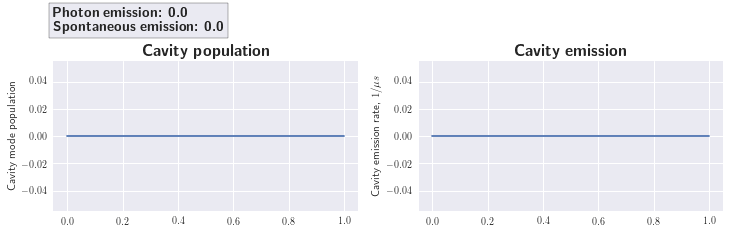

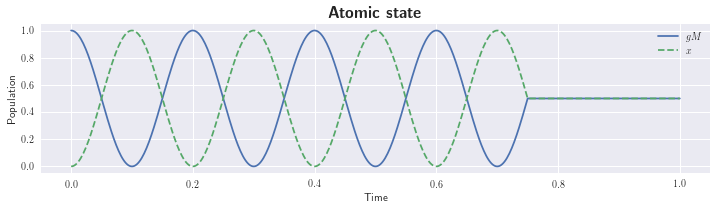

In [11]:
atom4lvl = Atom4lvl(gamma=0)
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 0. * 2.*np.pi)


# Our pulse will be on for 0.75us and then switch off.
# Note that couple_off_resonance=False means we only consider the 'gM' <-> 'x' transition coupled.
length_pulse = 0.75
laser_coupling = LaserCoupling(omega0=5 * 2*np.pi,
                               g='gM', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,-1],
                               pulse_shape='np.piecewise(t, [t<length_pulse], [1,0])',
                               args_ham={"length_pulse":length_pulse},
                               couple_off_resonance=False
                               )

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=laser_coupling,
                            cavity_couplings=[],
                            verbose=True)

psi0 = runner.ket('gM',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot(['gM', 'x'])

Now let's see what happens if we don't magically ignore other transitions the laser (which drives both $\sigma^{+}$ and $\sigma^{-}$ transitions) can couple.

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_3_9944.pyx.  Generated in 4.273 seconds.
Running simulation with 501 timesteps...finished in 0.142 seconds


(<matplotlib.figure.Figure at 0x11b5b2f98>,
 <matplotlib.figure.Figure at 0x118e40390>)

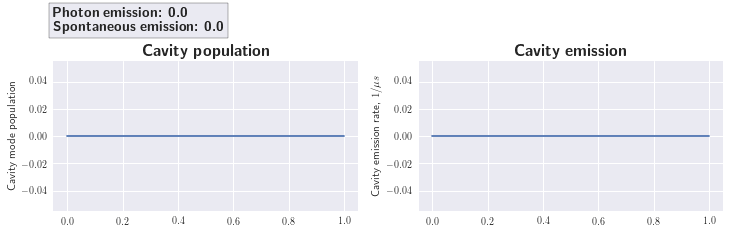

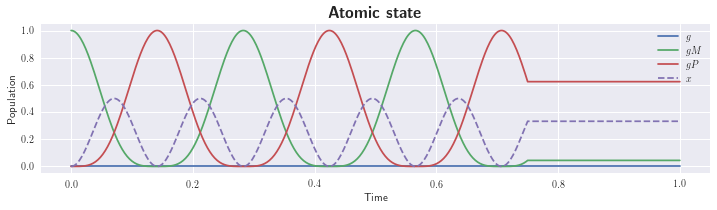

In [12]:
length_pulse = 0.75
laser_coupling = LaserCoupling(omega0=5 * 2*np.pi,
                               g='gM', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,-1],
                               pulse_shape='np.piecewise(t, [t<length_pulse], [1,0])',
                               args_ham={"length_pulse":length_pulse},
                               couple_off_resonance=True # <-- This is the change!
                               )

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=laser_coupling,
                            cavity_couplings=[],
                            verbose=True)

psi0 = runner.ket('gM',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

Now let's also couple $\pi$ transitions and, for fun, start with a random population distribution across the three ground levels.

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_4_9944.pyx.  Generated in 4.309 seconds.
Running simulation with 501 timesteps...finished in 0.199 seconds


(<matplotlib.figure.Figure at 0x11beace80>,
 <matplotlib.figure.Figure at 0x11bdc16a0>)

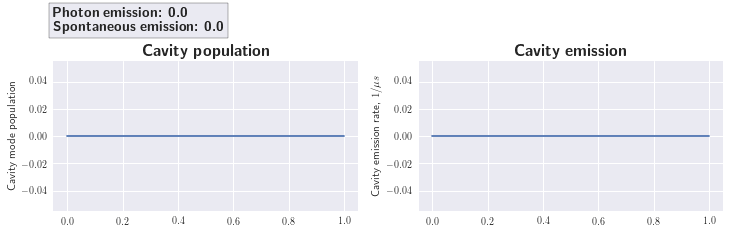

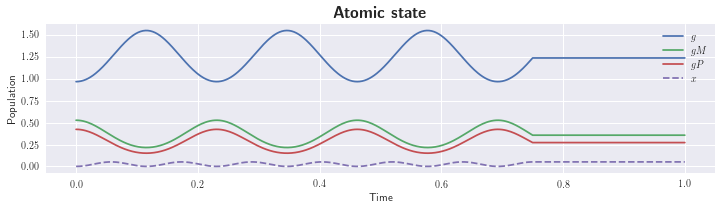

In [13]:
length_pulse = 0.75
laser_coupling = LaserCoupling(omega0=5 * 2*np.pi,
                               g='gM', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,0,-1],  # <-- Let's couple pi transitions too!
                               pulse_shape='np.piecewise(t, [t<length_pulse], [1,0])',
                               args_ham={"length_pulse":length_pulse},
                               couple_off_resonance=True
                               )

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=laser_coupling,
                            cavity_couplings=[],
                            verbose=True)

v = np.random.randn(3)
v /= np.sqrt(np.linalg.norm(v))

psi0 = v[0]*runner.ket('gM',0) + v[1]*runner.ket('g',0) + v[2]*runner.ket('gP',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

### 1.3 v-Stirap
<a id='sec_1_3'></a>

##### 1.3.1 Python-defined pulse shapes
<a id='sec_1_3_1'></a>

A v-Stirap process requires a shaped (i.e. time-dependent) laser pulse.  This controlled provided by the 'pulse_shape' argument of a LaserCoupling.  'pulse_shape' takes a string that defines a function of 't' -- the time -- that returns the pulse value at each timestep.  The total laser power at time 't' will then be 'omega0'*'pulse_shape(t)'.  Any additional (non-time dependet) arguments to be passed to the pulse_shape function are passed in the 'args_ham' dictionary.

These time-dependent coupling strengths are, at the back-end, realised with the ['String Format Method' of 'Solving Problems with Time-dependent Hamiltonians' from the QuTip](http://qutip.org/docs/latest/guide/dynamics/dynamics-time.html) and details fo the allowed functions can be found in the link.

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_1_17840.pyx.  Generated in 3.925 seconds.
Running simulation with 501 timesteps...finished in 0.126 seconds


(<matplotlib.figure.Figure at 0x11ed16ef0>,
 <matplotlib.figure.Figure at 0x12332fdd8>)

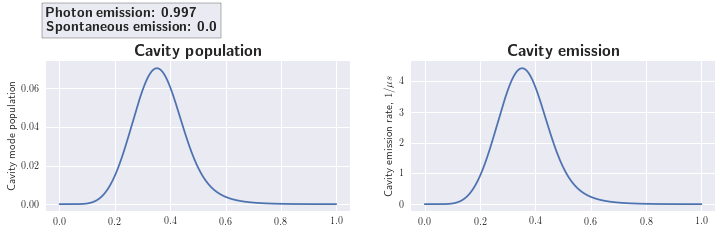

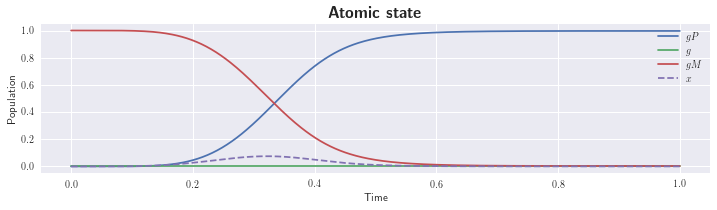

In [9]:
atom3lvl = Atom4lvl(gamma=0)
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 5. * 2.*np.pi)

length_pulse = 1
laser_coupling = LaserCoupling(omega0=5 * 2*np.pi,
                               g='gM', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,-1],
                               pulse_shape='np.piecewise(t, [t<length_pulse], [np.sin((np.pi/length_pulse)*t)**2,0])',
                               args_ham={"length_pulse":length_pulse},
                               couple_off_resonance=False
                               )

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=laser_coupling,
                            cavity_couplings=cavity_coupling,
                            verbose=True)

psi0 = runner.ket('gM',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

##### 1.3.2 C-defined pulse shapes
<a id='sec_1_3_2'></a>

The pulses can alternatively be defined by pure C-code that for an additional speed boost.  To do this we need to define the C-function in the .pyx file from which the Hamiltonian is compiled, and have the 'pulse_shape' call this C-function.  Once again addtional arguments to pass to the C_function can be passed in the 'args_ham' dictionary.

Setting up the .pyx file to provide the custom C-function is handled with the 'setup_pyx' and 'add_pyx' arguments.  Each is a list of strings, with those in 'setup_pyx' added at the top of the file before the imports (so this can be used if you want to import addtional libraries) and 'add_pyx' added after the imports (so this can be used to add extra functions to be callable from the main solver, such as your pulse shape).

As an example we will re-run the above simualtion, but with the laser pulse provided by a C-function.  The speed-up in this case is modest if at all, however the 'pulse_shape' function is called at every timestep for every configured coupling, and so for simulations with finer resolution or, particualrly, more couplings (such as when considering all off-resonant couplings in a more complex atomic structure like 87Rb), C-defined pulses can be considerably more efficient.

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_2_17840.pyx.  Generated in 5.123 seconds.
Running simulation with 501 timesteps...finished in 0.112 seconds


(<matplotlib.figure.Figure at 0x11fa8b128>,
 <matplotlib.figure.Figure at 0x123630048>)

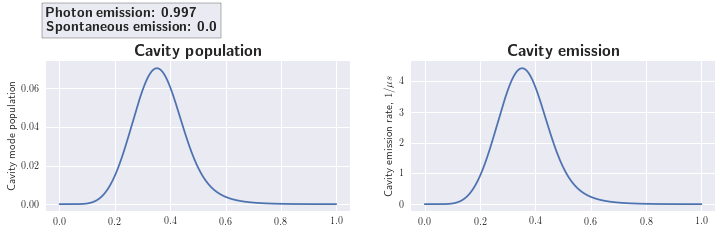

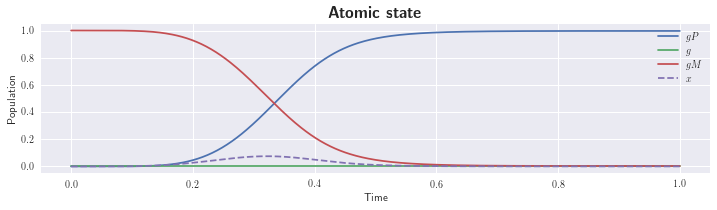

In [10]:
pulse_c_str = \
'''
@cython.cdivision(True)
@cython.boundscheck(False)
@cython.wraparound(False)
cdef double complex pulse_c(float t, float t_start, float t_end, float omega):
    if t_start<=t<=t_end: return sin(omega*(t-t_start))**2
    else: return 0
'''

length_pulse = 1
w_pulse = np.pi / length_pulse

laser_coupling = LaserCoupling(omega0=5 * 2*np.pi,
                               g='gM', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,-1],
                               pulse_shape='pulse_c(t, 0, length_pulse, w_pulse)',
                               args_ham={"length_pulse":length_pulse,
                                         "w_pulse":w_pulse},
                               setup_pyx=[''],
                               add_pyx=[pulse_c_str],
                               couple_off_resonance=False)

unner = ExperimentalRunner(atom4lvl,cav,laser_coupling,cavity_coupling,True)

psi0 = runner.ket('gM',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

### 1.4 Spontaneous emission
<a id='sec_1_4'></a>

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_6_9944.pyx.  Generated in 3.682 seconds.
Running simulation with 501 timesteps...finished in 0.07 seconds


(<matplotlib.figure.Figure at 0x11be50c50>,
 <matplotlib.figure.Figure at 0x11d691cc0>)

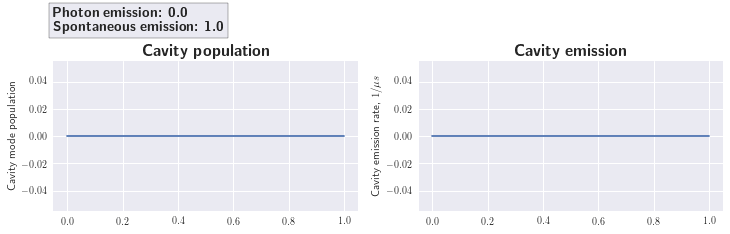

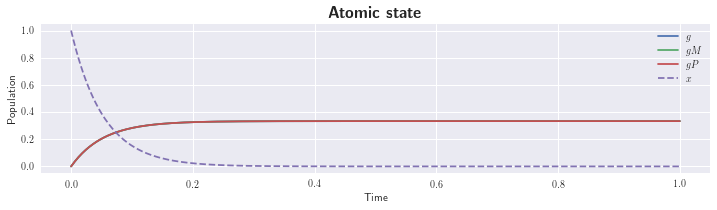

In [15]:
atom4lvl = Atom4lvl(gamma=3*np.pi)
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 5. * 2.*np.pi)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=[],
                            verbose=True)

psi0 = runner.ket('x',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

### 1.5 Customising the atom
<a id='sec_1_5'></a>

Here we demonstrate how the atom object can be modified.

#####  1.5.1 Configured energy levels
<a id='sec_1_5_1'></a>

As introduced above, the Atom4lvl has three ground states and one excited state, and so is already a fairly simple system.  However, if you want to further reduce the system a subset of the these levels can be configured by the 'configured_states' parameter.

It is also possible to directly modify the 'g_states' and 'x_states' dictionaries, however this is duplicated functionality with 'configured_states' and so the use of the later is recommended.

In [16]:
atom2lvl = Atom4lvl(gamma=0, configured_states=['gP','x'])
atom4lvl = Atom4lvl(gamma=0)

for atom, n_lev in zip([atom2lvl, atom4lvl],[2,4]):
    print('atom{}lvl'.format(n_lev))
    print('\t', atom.g_states, atom.x_states)
    print('\t', atom.transition_strengths)

atom2lvl
	 {'gP': 0} {'x': 1}
	 {'x': {'gP': 1}}
atom4lvl
	 {'gM': 0, 'g': 1, 'gP': 2} {'x': 3}
	 {'x': {'gM': 1, 'g': 1, 'gP': 1}}


In [17]:
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 0. * 2.*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)


runner2lvl = ExperimentalRunner(atom=atom2lvl,
                                cavity=cav,
                                laser_couplings=[],
                                cavity_couplings=cavity_coupling,
                                verbose=True)

runner4lvl = ExperimentalRunner(atom=atom4lvl,
                                cavity=cav,
                                laser_couplings=[],
                                cavity_couplings=cavity_coupling,
                                verbose=True)

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_7_9944.pyx.  Generated in 3.73 seconds.
Pre-compiled Hamiltonian, ExperimentalRunner_Hamiltonian_0_9944.pyx, is suitable to run this experiment.


For 2-level system we have the following interaction Hamiltonians and results:


[[Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
  Qobj data =
  [[ 0.  0.  0.  0.]
   [ 0.  0. -1.  0.]
   [ 0. -1.  0.  0.]
   [ 0.  0.  0.  0.]], 'g0_gPx * cos(omegaC_gPx*t)'],
 [Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
  Qobj data =
  [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j  0.-1.j  0.+0.j]
   [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]],
  'g0_gPx * sin(omegaC_gPx*t)']]

Running simulation with 501 timesteps...finished in 0.08 seconds


(<matplotlib.figure.Figure at 0x118e57400>,
 <matplotlib.figure.Figure at 0x11dc84c88>)

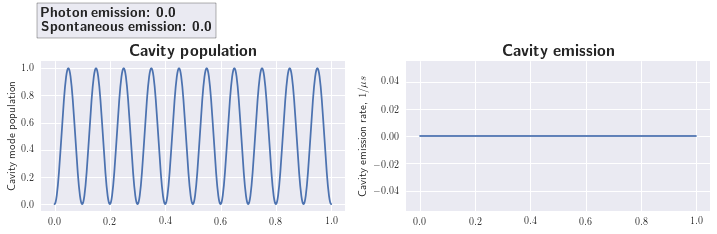

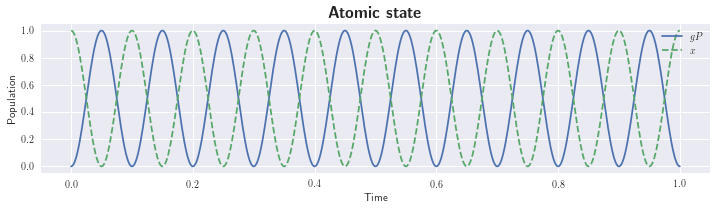

In [18]:
print('For 2-level system we have the following interaction Hamiltonians and results:')

display(runner2lvl.compiled_hamiltonian.hams)

psi0 = runner2lvl.ket('x',0)
t_length = 1
n_steps = 501

results = runner2lvl.run(psi0, t_length, n_steps)

results.plot()

For 4-level system we have the following interaction Hamiltonians and results:


[[Quantum object: dims = [[4, 2], [4, 2]], shape = (8, 8), type = oper, isherm = True
  Qobj data =
  [[ 0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0. -1.  0.]
   [ 0.  0.  0.  0.  0. -1.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.]], 'g0_gPx * cos(omegaC_gPx*t)'],
 [Quantum object: dims = [[4, 2], [4, 2]], shape = (8, 8), type = oper, isherm = True
  Qobj data =
  [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.-1.j  0.+0.j]
   [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+1.j  0.+0

Running simulation with 501 timesteps...

finished in 0.354 seconds


(<matplotlib.figure.Figure at 0x11c2ab5f8>,
 <matplotlib.figure.Figure at 0x11ba8b128>)

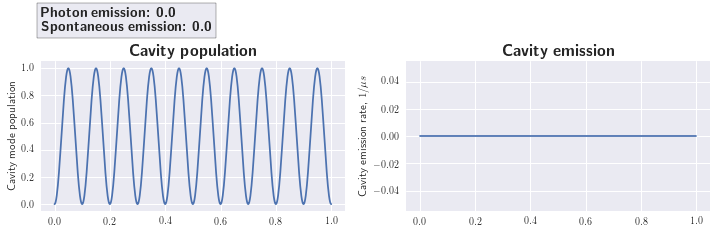

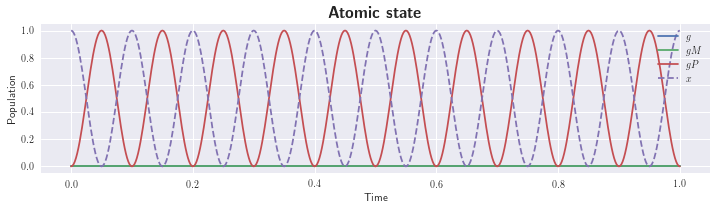

In [19]:
print('For 4-level system we have the following interaction Hamiltonians and results:')

display(runner4lvl.compiled_hamiltonian.hams)

psi0 = runner4lvl.ket('x',0)
t_length = 1
n_steps = 501

results = runner4lvl.run(psi0, t_length, n_steps)

results.plot()

#####  1.5.2 Configured transition strengths
<a id='sec_1_5_2'></a>

The transtion strengths (proporional to the reduced dipole moment squared) determine the effective coupling strength on different transitions, and the relative rates of spontaneous emission on each channel.

In [20]:
atomA = Atom4lvl(gamma=0, transition_strengths={'x':{'gM':0,'g':0,'gP':0.5}})
atomB = Atom4lvl(gamma=0, transition_strengths={'x':{'gM':1,'g':1,'gP':1}})

cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 0. * 2.*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)


runnerA = ExperimentalRunner(atom=atomA,
                                cavity=cav,
                                laser_couplings=[],
                                cavity_couplings=cavity_coupling,
                                verbose=True)

runnerB = ExperimentalRunner(atom=atomB,
                                cavity=cav,
                                laser_couplings=[],
                                cavity_couplings=cavity_coupling,
                                verbose=True)

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_8_9944.pyx.  Generated in 3.789 seconds.
Pre-compiled Hamiltonian, ExperimentalRunner_Hamiltonian_0_9944.pyx, is suitable to run this experiment.


So we see that the Rabi frequency is halfed on the transition with half the coupling strength...

Running simulation with 501 timesteps...finished in 0.075 seconds


Running simulation with 501 timesteps...finished in 0.071 seconds


(<matplotlib.figure.Figure at 0x1183b6278>,
 <matplotlib.figure.Figure at 0x11e633b70>)

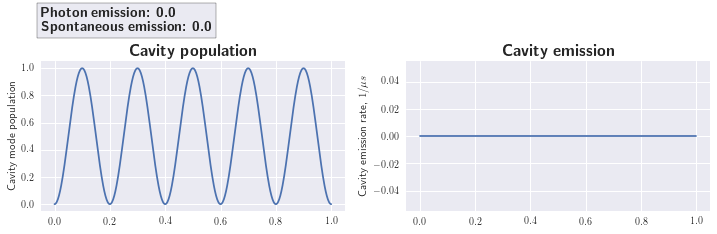

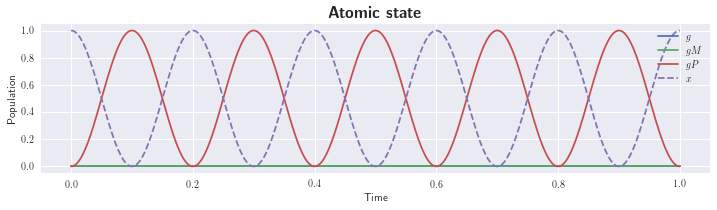

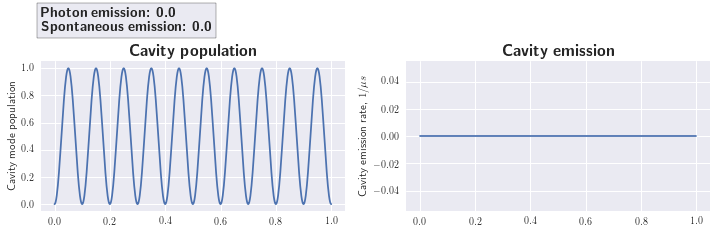

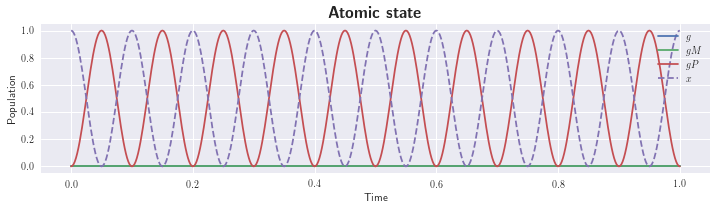

In [21]:
psi0 = ['x',0]
t_length = 1
n_steps = 501

runnerA.run(psi0, t_length, n_steps).plot()
runnerB.run(psi0, t_length, n_steps).plot()

Turning off the cavity coupling, and turing on atomic decay we also see how spontaneous decay is effected.  We note that the transition strength does (of course) effect the overall rate of spontaneous emission on that channel, however it is automatically assumed that all spontaneous emission must go somewhere in our system, i.e. the dissipative terms in our system -- namely spontaneous emission and cavity decay -- are couplings between states rather than losses from the system.  In the former case this is a coupling between atomic states
	|x-state, n_cav> -> |g_state, n_cav>,
and the later case is realised with
	|atom_state, n_cav> -> |atom_state, n_cav - 1>.
Practically this means the branching ratios of the allowed spontaneous emission channels are always adjusted such that they sum to one.

*Note of warning*

As the rate of decay of the atomic amplitude, $\gamma$, is defined in the atom, changing the values 'transition_strength' will not alter the total rate of spontanoues emission from the excited state - only the relative branching ratios of the decay.  In contrast, when the 'transition_strength' is changed, the response of the atom to an external field (be it a cavity coupling or a laser coupling), will also change (as we have just seen above).

In [22]:
for atom, lab in zip([atomA, atomB],['A','B']):
    print('For atom{}'.format(lab))
    atom.gamma = 0.1*2*np.pi
    print('\tTransition strengths: ', atom.transition_strengths)
    print('\tSpontaneous emission branching ratios: ', list(atom.get_spontaneous_emission_channels()))

For atomA
	Transition strengths:  {'x': {'gM': 0, 'g': 0, 'gP': 0.5}}
	Spontaneous emission branching ratios:  [('gM', 'x', 0.0), ('g', 'x', 0.0), ('gP', 'x', 1.0)]
For atomB
	Transition strengths:  {'x': {'gM': 1, 'g': 1, 'gP': 1}}
	Spontaneous emission branching ratios:  [('gM', 'x', 0.3333333333333333), ('g', 'x', 0.3333333333333333), ('gP', 'x', 0.3333333333333333)]


No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_9_9944.pyx.  Generated in 3.713 seconds.
No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_10_9944.pyx.  Generated in 3.731 seconds.
Running simulation with 501 timesteps...finished in 0.071 seconds
Running simulation with 501 timesteps...finished in 0.071 seconds


(<matplotlib.figure.Figure at 0x11ed20128>,
 <matplotlib.figure.Figure at 0x11eb6d0f0>)

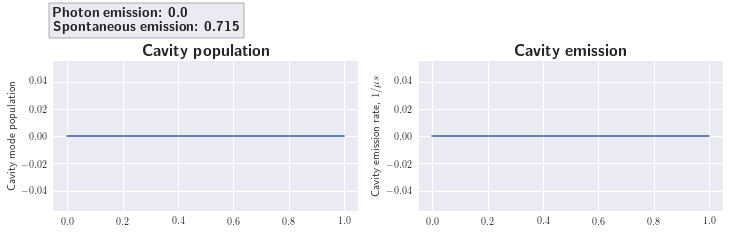

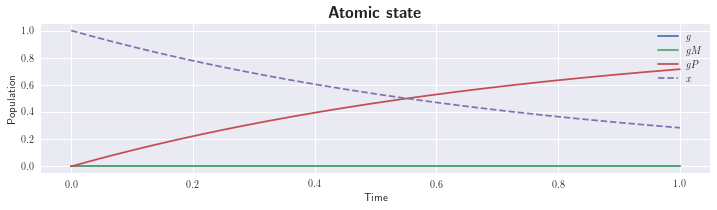

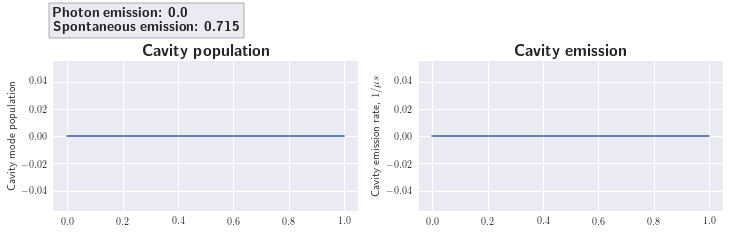

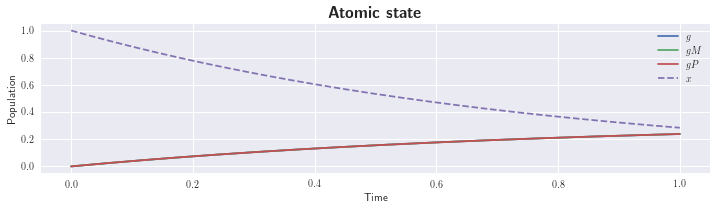

In [23]:
runnerA = ExperimentalRunner(atomA,cav,[],[],verbose=True)
runnerB = ExperimentalRunner(atomB,cav,[],[],verbose=True)

psi0 = ['x',0]
t_length = 1
n_steps = 501

resultsA = runnerA.run(psi0, t_length, n_steps)
resultsB = runnerB.run(psi0, t_length, n_steps)

resultsA.plot()
resultsB.plot()

We can check this is doing what we expect.  The excited state population is expected to decay exponentially at a rate $\Gamma=2\gamma$.  So for each atom let's calcualte the expected and the simulated population remaining in the excited state after the simulation.

In [24]:
for lab, atom, res in zip(['A','B'],[atomA,atomB],[resultsA, resultsB]):
    print(textwrap.dedent('''\
    For atom{0}, we expect (simulate) the total population in x at the end of the simulation to be np.exp(-2*atom.gamma*t_length)={1} ({2}).\
    '''.format(*([lab] + [np.round(x,3) for x in [np.exp(-2*atom.gamma*t_length), res.get_atomic_population('x',-1)[0]]]))))

For atomA, we expect (simulate) the total population in x at the end of the simulation to be np.exp(-2*atom.gamma*t_length)=0.285 (0.285).    
For atomB, we expect (simulate) the total population in x at the end of the simulation to be np.exp(-2*atom.gamma*t_length)=0.285 (0.285).    
